In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [64]:
np.random.seed(0)

In [65]:
dog_ear_flappiness_index=np.random.normal(loc=8,scale=1,size=10)
dog_whisker_length=np.random.normal(loc=5,scale=1,size=10)

In [66]:
cat_ear_flappiness_index=np.random.normal(loc=5,scale=1,size=10)
cat_whisker_length=np.random.normal(loc=8,scale=1,size=10)

In [67]:
dogs_data=np.vstack((dog_ear_flappiness_index,dog_whisker_length)).T
cats_data=np.vstack((cat_ear_flappiness_index,cat_whisker_length)).T
data=np.vstack((dogs_data,cats_data))
labels=np.hstack((np.zeros(len(dogs_data)),np.ones(len(cats_data))))
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [68]:
x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=42)
y_train

array([0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.])

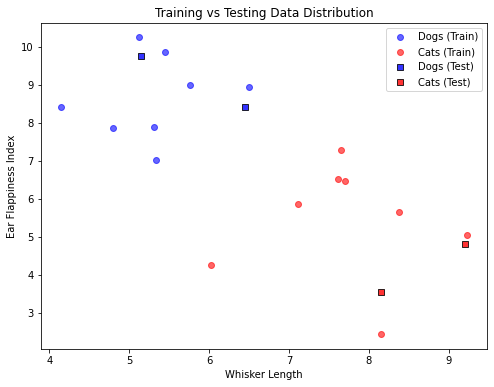

In [18]:


# Separate training data into dogs and cats
# dogs_train = x_train[y_train == 0]  # Extract dogs (label 0) from training set
# cats_train = x_train[y_train == 1]  # Extract cats (label 1) from training set

# # Separate testing data into dogs and cats
# dogs_test = x_test[y_test == 0]  # Extract dogs (label 0) from testing set
# cats_test = x_test[y_test == 1]  # Extract cats (label 1) from testing set

# plt.figure(figsize=(8, 6))

# # Plot training data
# plt.scatter(dogs_train[:, 1], dogs_train[:, 0], color='blue', label='Dogs (Train)', marker='o', alpha=0.6)
# plt.scatter(cats_train[:, 1], cats_train[:, 0], color='red', label='Cats (Train)', marker='o', alpha=0.6)

# # Plot testing data
# plt.scatter(dogs_test[:, 1], dogs_test[:, 0], color='blue', edgecolors='black', label='Dogs (Test)', marker='s', alpha=0.8)
# plt.scatter(cats_test[:, 1], cats_test[:, 0], color='red', edgecolors='black', label='Cats (Test)', marker='s', alpha=0.8)

# # Labels and legend
# plt.xlabel("Whisker Length")
# plt.ylabel("Ear Flappiness Index")
# plt.legend()
# plt.title("Training vs Testing Data Distribution")
# plt.show()


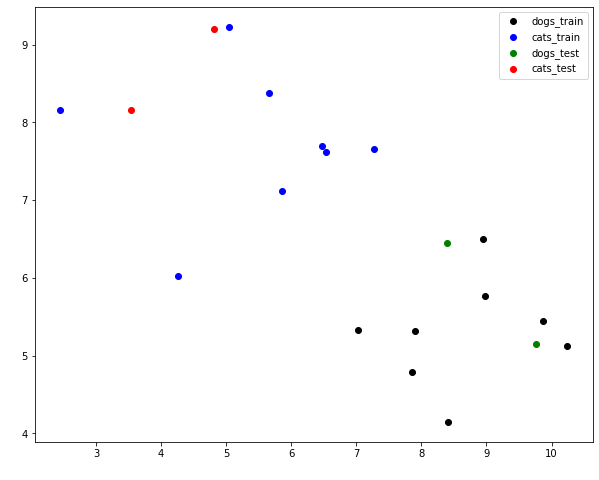

In [80]:
dogs_train=x_train[y_train==0]
cats_train=x_train[y_train==1]
cats_test=x_test[y_test==1]
dogs_test=x_test[y_test==0]

plt.figure(figsize=(10,8))
plt.scatter(dogs_train[:,0],dogs_train[:,1],color="BLACK",label="dogs_train")
plt.scatter(cats_train[:,0],cats_train[:,1],color="blue",label="cats_train")
plt.scatter(dogs_test[:,0],dogs_test[:,1],color= "GREEN",marker="o",label="dogs_test")
plt.scatter(cats_test[:,0],cats_test[:,1],  color="RED" ,marker="o",label="cats_test")
plt.xlabel("Whisker Length",color="white")
plt.ylabel("Ear Flappiness Index",color="white")
plt.legend()
plt.show()

In [81]:
def random_linear_classifier(dogs_data,cats_data,k,d):
    best_error=float('inf')
    best_theta=None
    best_theta_not=None 

    for _ in range(k):
     theta=np.random.normal(size=d)
     theta_not=np.random.normal()
     error=compute_error(theta,theta_not,dogs_data,cats_data)
     if(error<best_error):
      best_error=error
      best_theta=theta
      best_theta_not=theta_not

    return best_theta,best_theta_not



In [82]:
def compute_error(theta,theta_not,dogs_data,cats_data):
    error=0
    for x in dogs_data:
        if np.dot(theta,x)+theta_not<=0:
            error+=1
    for y in cats_data:
        if np.dot(theta,y)+theta_not>0:
            error+=1
    return error

In [83]:
k=100
d=2
best_Theta,best_theta_not=random_linear_classifier(x_train[y_train==0],x_train[y_train==1],k,d)
print(best_Theta)
print(best_theta_not)

[ 0.77416061 -0.77445897]
0.10490716508551272


In [84]:
#plotting the decision Boundary
x_vals=np.linspace(2,10,100)
y_vals=(-best_Theta[0]/best_Theta[1])*x_vals-(best_theta_not/best_Theta[1])

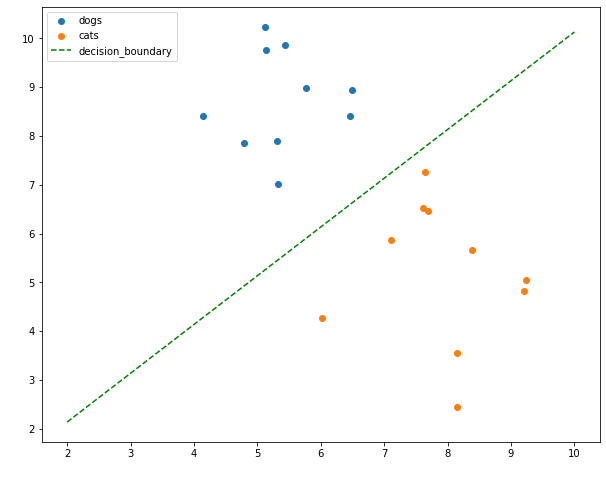

In [89]:
plt.figure(figsize=(10,8))

plt.scatter(x_train[y_train==0][:,0],x_train[y_train==0][:,1],label="dogs")
plt.scatter(x_train[y_train==1][:,0],x_train[y_train==1][:,1],label="cats")
plt.plot(x_vals,y_vals,color='green',linestyle='--',label="decision_boundary")
plt.xlabel("whiskerLength",color="white")
plt.ylabel("ear_flappiness_index",color="white")
plt.legend()
plt.show()